## NLP
We'll be getting articles from Wikipedia, and parsing them with spaCy/DaCy.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import wikipedia
import wikipediaapi

import fetch
from fetch.utils import json_or_fetch

In [2]:
df_company = pd.read_csv('data/3_geolocation.csv', index_col=0)

In [3]:
# wiki_wiki = wikipediaapi.Wikipedia('da')

In [4]:
wikipedia.set_lang('da')

In [5]:
# pages = {}
# for i in df_company.index:
#     try:
#         page = wikipedia.page(i)
#         print(i, page.url)
#         pages[i] = page
#     except wikipedia.exceptions.DisambiguationError as e:
#         print(i, e.options)
#     except wikipedia.exceptions.PageError as e:
#         print(i, e)

In [6]:
keys = df_company.index
args = tuple(zip(keys))

In [7]:
pages = json_or_fetch(fetch.wikipedia, keys, args, path='data/wikipedia_pages.json')

In [8]:
import dacy
import nltk
from string import punctuation

In [9]:
for model in dacy.models():
    print(model)

da_dacy_small_tft-0.0.0
da_dacy_medium_tft-0.0.0
da_dacy_large_tft-0.0.0
da_dacy_small_trf-0.1.0
da_dacy_medium_trf-0.1.0
da_dacy_large_trf-0.1.0
da_dacy_small_trf-latest
da_dacy_medium_trf-latest
da_dacy_large_trf-latest


In [10]:
nlp = dacy.load('da_dacy_medium_trf-latest') # or specific version (0.1.0) or just 'medium'

c:\Python39\lib\site-packages\spacy\util.py:887: UserWarning: [W095] Model 'da_dacy_medium_trf' (0.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.5.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
c:\Python39\lib\site-packages\spacy_transformers\pipeline_component.py:402: UserWarning: Automatically converting a transformer component from spacy-transformers v1.0 to v1.1+. If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spacy-transformers version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [11]:
# nltk.download('stopwords')
da_stopwords = nltk.corpus.stopwords.words('danish')

Just a test to show filtering out stopwords and punctuation.

In [12]:
text = "Det her er noget tekst til at teste, hvad Dacy kan. Jeg håber, at den kan finde ord som 'test' og 'håber'."
doc = nlp(text)
for token in doc:
    # easier than "token is not in da_stopwords and token not in punctuation"
    # also means you don't have to lowercase the tokens
    if not token.is_stop and not token.is_punct:
        print(token.lemma_, token.pos_)

tekst NOUN
teste VERB
Dacy PROPN
håbe VERB
finde VERB
ord NOUN
test NOUN
håbe NOUN


c:\Python39\lib\site-packages\spacy\pipeline\attributeruler.py:150: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  matches = self.matcher(doc, allow_missing=True, as_spans=False)


In [13]:
from wordcloud import WordCloud

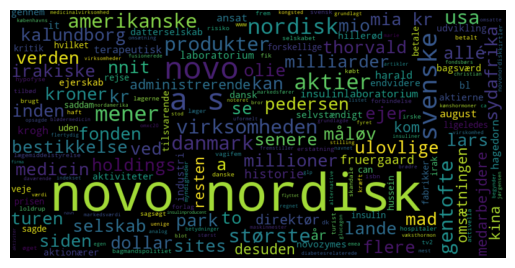

In [14]:
wordcloud = WordCloud(width=800, height=400, stopwords=da_stopwords).generate(pages['Novo Nordisk'].lower())
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

I'm sorry, but I don't know what kind of application or prototype would be suitable for this data. Maybe a summarisation thing like shown in class, finding the sentences closest to a centroid. I didn't have a lot of time to really explore and come up with an application, so all I did was a word cloud.